<a href="https://colab.research.google.com/github/gamal-zayed/machine-learning/blob/main/Lab_7_SVR_F_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("sample_data/HousingData.csv")

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
len(df)

506

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


In [ ]:
abs(df.corr())['MEDV'].sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.735822
RM         0.695360
PTRATIO    0.507787
INDUS      0.481772
TAX        0.468536
NOX        0.427321
AGE        0.394656
CRIM       0.391363
RAD        0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

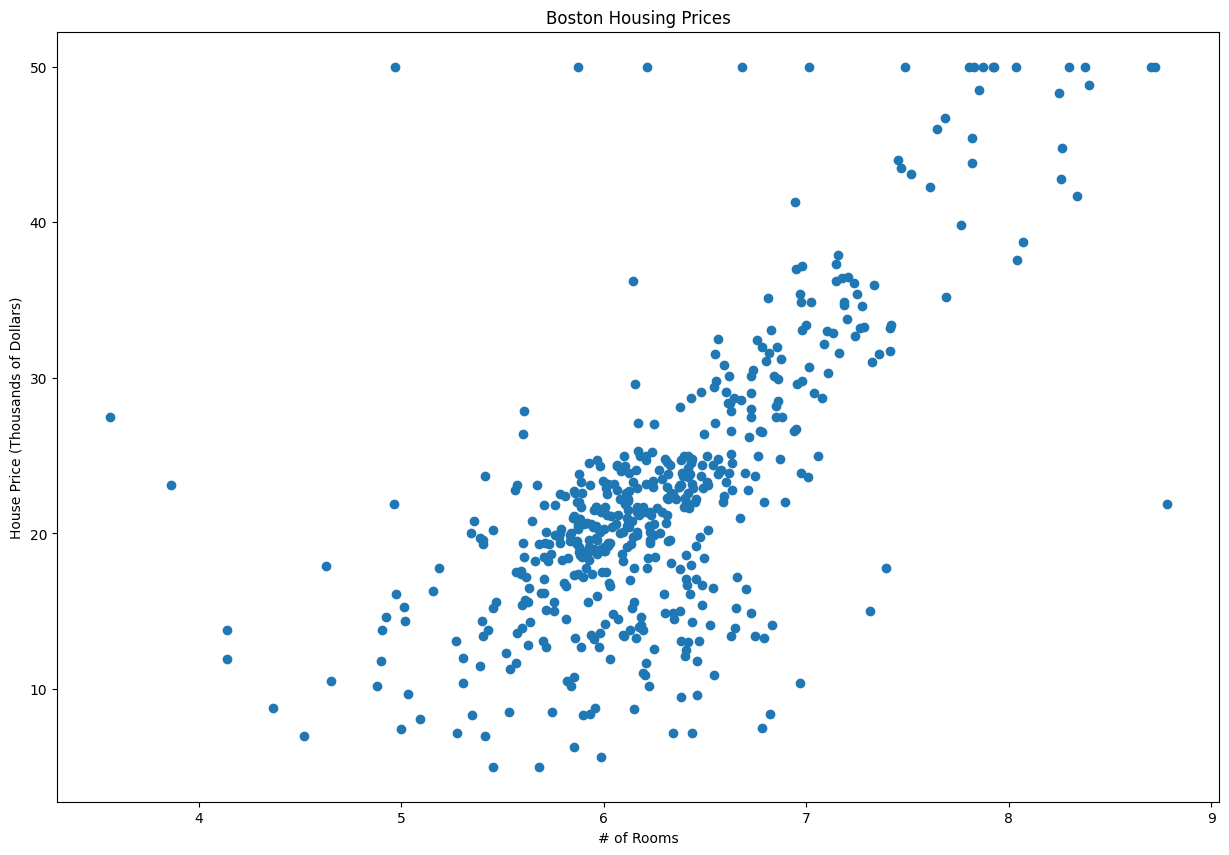

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['RM'], y=df['MEDV'])
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Boston Housing Prices')
plt.show()

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(df['RM']).reshape(-1,1)
y = np.array(df['MEDV']).reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

Intercept: -35.424
Coefficient: 9.213
MAE = $4,521.71


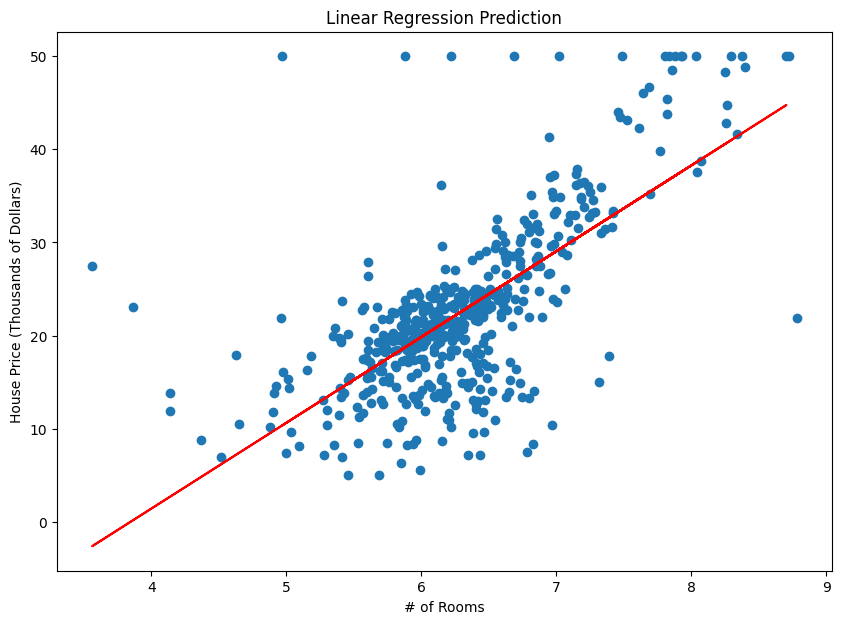

In [ ]:
from sklearn.metrics import mean_absolute_error

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))

mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['RM'], y=df['MEDV'])
plt.plot(X_test, lm.predict(X_test), color='red')
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Linear Regression Prediction')
plt.show()

## SVR

### Define performance results function

In [ ]:
def svr_results(y_test, X_test, fitted_svr_model):

    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))

    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))

    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mae))

    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['RM'], y=df['MEDV'])
    plt.plot(X_test, fitted_svr_model.predict(X_test), color='red')
    plt.plot(X_test, fitted_svr_model.predict(X_test)+eps, color='black')
    plt.plot(X_test, fitted_svr_model.predict(X_test)-eps, color='black')
    plt.xlabel('# of Rooms')
    plt.ylabel('House Price (Thousands of Dollars)')
    plt.title('SVR Prediction')
    plt.show()

### Simple LinearSVR

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
eps = 5
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)

In [ ]:
svr.fit(X_train, y_train)

LinearSVR(C=0.01, epsilon=5)

C: 0.01
Epsilon: 5
Intercept: 0.369
Coefficient: 3.136
MAE = $5,891.23
Percentage within Epsilon = 73.53%


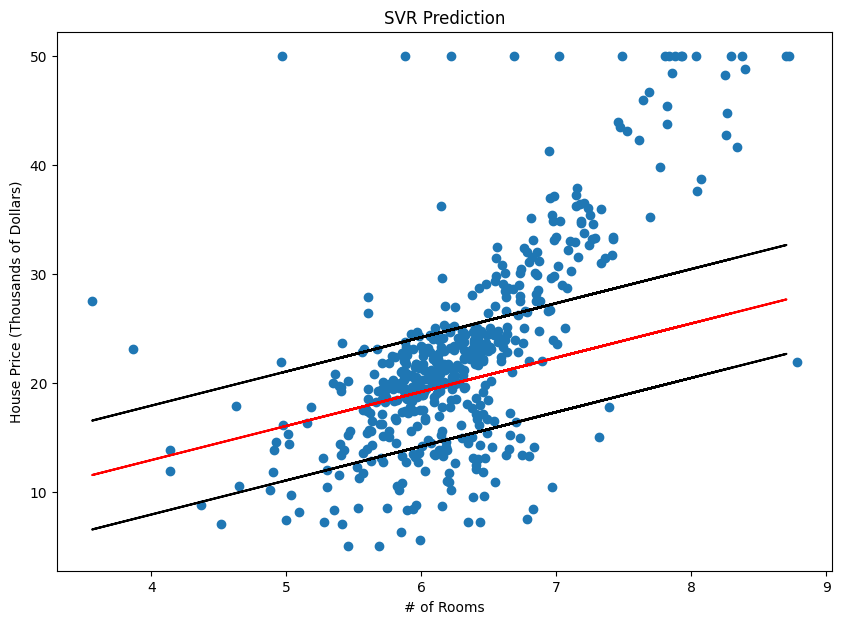

In [ ]:
svr_results(y_test, X_test, svr)

### Larger Penalty ( = Larger C)

In [ ]:
eps = 5
svr_high_C = LinearSVR(epsilon=eps, C=1.0, fit_intercept=True)

In [ ]:
svr_high_C.fit(X_train, y_train)

LinearSVR(epsilon=5)

C: 1.0
Epsilon: 5
Intercept: -10.025
Coefficient: 5.166
MAE = $4,921.02
Percentage within Epsilon = 81.37%


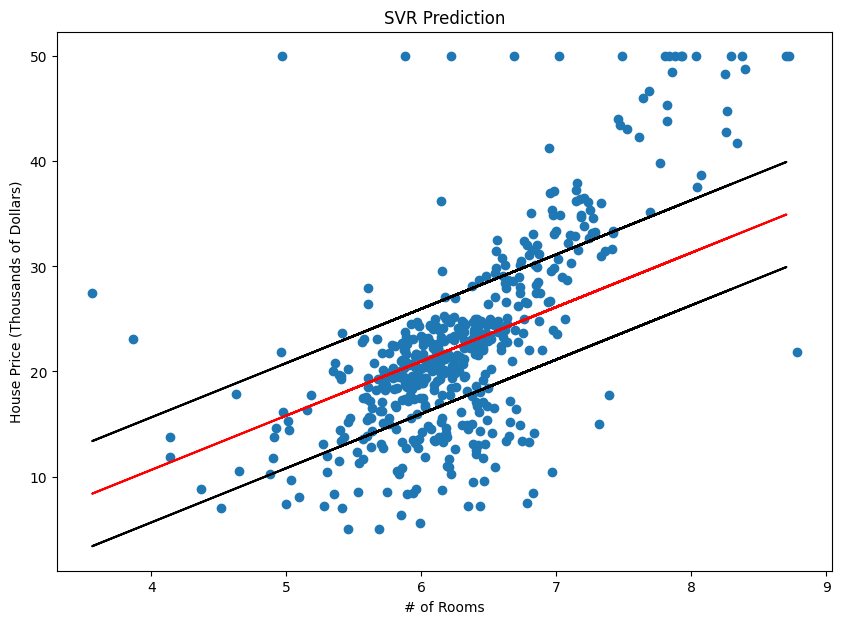

In [ ]:
svr_results(y_test, X_test, svr_high_C)

More points are within our margin (epsilon), since we increased C to 1.0

### Vary C

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
test_mae_list = []
perc_within_eps_list = []

eps = 5
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True, max_iter=10000)

    varied_svr.fit(X_train, y_train)

    test_mae = mean_absolute_error(y_test, varied_svr.predict(X_test))
    test_mae_list.append(test_mae)

    perc_within_eps = 100*np.sum(abs(y_test-varied_svr.predict(X_test)) <= eps) / len(y_test)
    perc_within_eps_list.append(perc_within_eps)

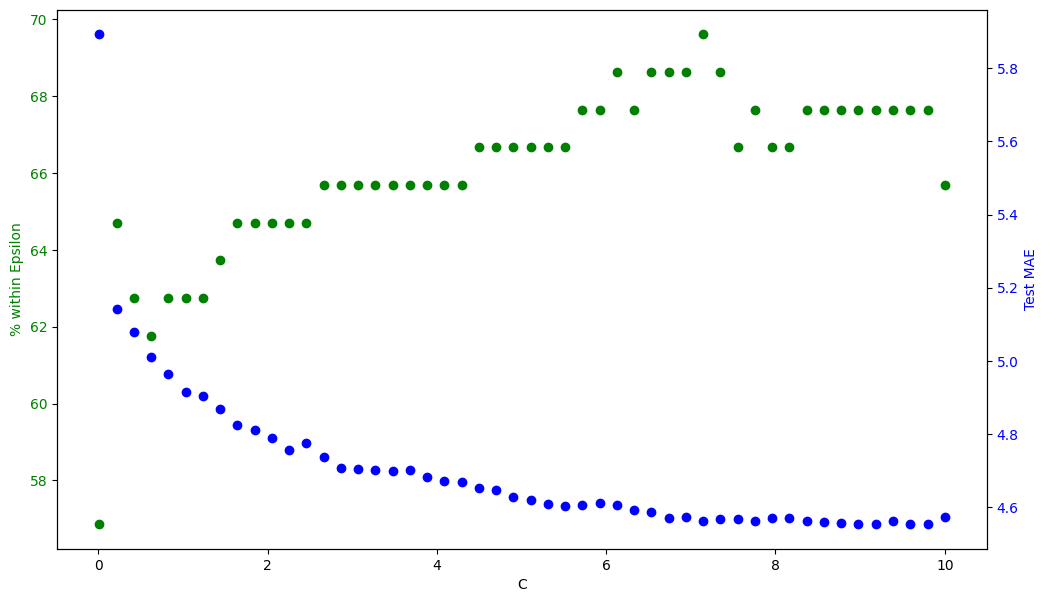

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

In [ ]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 7.145714285714286


###### Best C from GridSearch

C: 7.145714285714286
Epsilon: 5
Intercept: -30.012
Coefficient: 8.306
MAE = $4,576.60
Percentage within Epsilon = 85.29%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


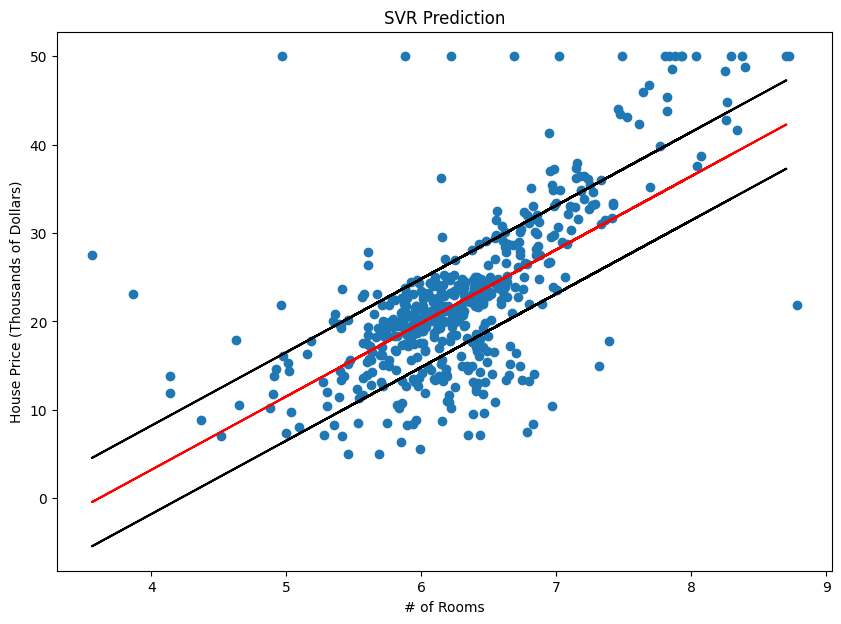

In [ ]:
eps = 5
svr_best_C = LinearSVR(epsilon=eps, C=C, fit_intercept=True)
svr_best_C.fit(X_train, y_train)
svr_results(y_test, X_test, svr_best_C)

----

### Bonus: Grid Search over C and Epsilon

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [ ]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}

svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)

#### Scoring Criteria = MAE

In [ ]:
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_absolute_error')

In [ ]:
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

LinearSVR(C=10.0, epsilon=0.41775510204081634, max_iter=10000)

C: 10.0
Epsilon: 0.41775510204081634
Intercept: -34.326
Coefficient: 9.062
MAE = $4,520.57
Percentage within Epsilon = 86.27%


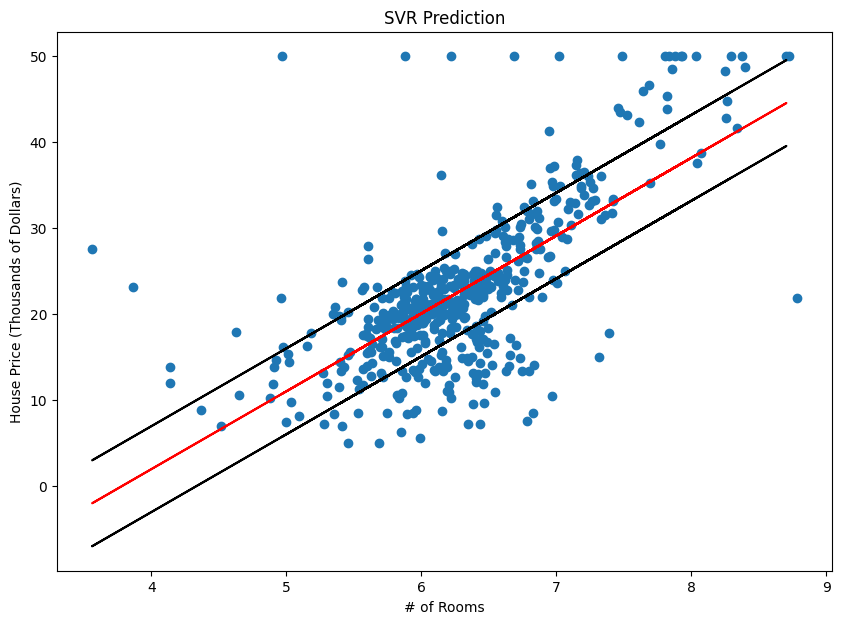

In [ ]:
svr_results(y_test, X_test, best_grid_svr_mae)

#### Scoring Critera = % within Epsilon

In [ ]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}

#s

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
def frac_within_eps(y_true, y_pred):
    return np.sum(abs(y_true-y_pred) <= eps) / len(y_true)

my_scorer = make_scorer(frac_within_eps, greater_is_better=True)

In [ ]:
grid_svr_eps = GridSearchCV(svr_gridsearch, grid, scoring=my_scorer, cv=5)

In [ ]:
grid_svr_eps.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring=make_scorer(frac_within_eps))

In [ ]:
best_grid_svr_eps = grid_svr_eps.best_estimator_

In [ ]:
best_grid_svr_eps.fit(X_train, y_train)

LinearSVR(C=9.796122448979592, epsilon=3.679795918367347, max_iter=10000)

C: 9.796122448979592
Epsilon: 3.679795918367347
Intercept: -32.796
Coefficient: 8.802
MAE = $4,526.00
Percentage within Epsilon = 85.29%


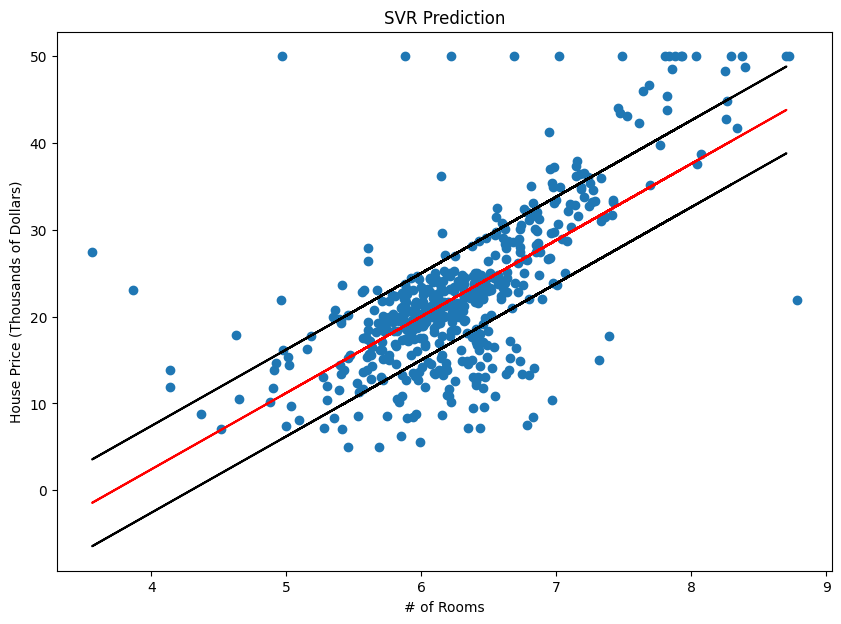

In [ ]:
svr_results(y_test, X_test, best_grid_svr_eps)

# Reference :

https://github.com/tomsharp/SVR